# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [12]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [13]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
# Set the Mapbox API
px.set_mapbox_access_token(mapbox_token)
type(mapbox_token)

str

# Import Data

In [14]:
# Import the CSVs to Pandas DataFrames
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [15]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    # Calculate the mean number of housing units per year 
    housing_units_df = sfo_data["housing_units"]
    housing_units_df = housing_units_df.groupby("year").mean()
    # Pandas plot function to plot the average housing units per year.
    figure_housing_units = plt.figure()
    plot_housing_units = housing_units_df.plot.bar()
    plot_housing_units.set_xlabel("Year", fontsize=12)
    plot_housing_units.set_ylabel("Housing Units", fontsize=12)
    plot_housing_units.set_title("Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold")
    # Optional Challenge: Use the min, max, and std to scale the y limits of the chart
    housing_units_min = min(housing_units_df)
    housing_units_max = max(housing_units_df)
    housing_units_std = housing_units_df.std()
    plot_housing_units.set_ylim(housing_units_min - housing_units_std, housing_units_max + housing_units_std)
    plt.close(figure_housing_units)
    
    return pn.pane.Matplotlib(figure_housing_units, tight=True)

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    # Calculate the average gross rent per square foot
    avg_rent_df = sfo_data["gross_rent"].groupby("year").mean()
    # Plot the Average Gross Rent per Year as a Line Chart 
    figure_avg_rent = plt.figure()
    plot_avg_rent = avg_rent_df.plot()
    plot_avg_rent.set_xlabel("Year", fontsize=12)
    plot_avg_rent.set_ylabel("Gross Rent", fontsize=12)
    plot_avg_rent.set_title("Average Gross Rent in San Francisco", fontsize=14, fontweight="bold")
    plt.close(figure_avg_rent)

    return pn.pane.Matplotlib(figure_avg_rent, tight=True)

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # Calculate the average sale price per square foot
    avg_sale_df = sfo_data["sale_price_sqr_foot"].groupby("year").mean()
    # Plot the Average Sales Price per Year as a line chart
    figure_avg_sale = plt.figure()
    plot_avg_sale = avg_sale_df.plot()
    plot_avg_sale.set_xlabel("Year", fontsize=12)
    plot_avg_sale.set_ylabel("Gross Rent", fontsize=12)
    plot_avg_sale.set_title("Average Sale Price per Square Foot in San Francisco", fontsize=14, fontweight="bold")
    plt.close(figure_avg_sale)
    
    return pn.pane.Matplotlib(figure_avg_sale, tight=True)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # Group by year and neighborhood and then create a new dataframe of the mean values
    sfo_data_df = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    sfo_data_df = sfo_data.reset_index()
    # Use hvplot to create an interactive line chart of the average price per sq ft.
    avg_price_by_neighborhood_line_plot = sfo_data_df.hvplot.line(
        "year", "sale_price_sqr_foot", xlabel="Year", ylabel="Average Price Per Square Foot", groupby="neighborhood")
        
    return avg_price_by_neighborhood_line_plot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # Getting the data from the top 10 expensive neighborhoods
    top_10_neighborhood = sfo_data.groupby("neighborhood").mean()
    top_10_neighborhood_df = top_10_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    top_10_neighborhood_df = top_10_neighborhood_df.reset_index()
    # Plotting the data from the top 10 expensive neighborhoods
    top_10_expensive_neighborhood_plot = top_10_neighborhood_df.hvplot.bar(
        "neighborhood", "sale_price_sqr_foot", title="Top 10 Expensive Neighborhoods in San Francisco", 
        xlabel="Neighborhood", ylabel="Average Sale Price Per Square Foot", height=400, rot=90)
    
    return top_10_expensive_neighborhood_plot


def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    top_10_neighborhood = sfo_data.groupby("neighborhood").mean()
    top_10_neighborhood_df = top_10_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    top_10_neighborhood_df = top_10_neighborhood_df.reset_index()
    # Parallel Coordinates Plot
    parallel_coordinates_plot = px.parallel_coordinates(
        top_10_neighborhood_df, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Viridis)
    
    return parallel_coordinates_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    top_10_neighborhood = sfo_data.groupby("neighborhood").mean()
    top_10_neighborhood_df = top_10_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    top_10_neighborhood_df = top_10_neighborhood_df.reset_index()
    # Parallel Categories Plot
    parallel_categories_plot = px.parallel_categories(
        top_10_neighborhood_df, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Plasma)
    
    return parallel_categories_plot

def neighborhood_map():
    """Neighborhood Map"""
    
    # Set the Mapbox API
    px.set_mapbox_access_token(mapbox_token)
    # Calculate the mean values for each neighborhood
    neighborhood_mean_df = sfo_data.groupby(by="neighborhood").mean().reset_index()
    neighborhood_mean_df.rename(columns={"neighborhood":"Neighborhood"}, inplace=True)
    # Join the average values with the neighborhood locations
    all_neighborhood_data_df = pd.merge(neighborhood_locations_df, neighborhood_mean_df, on="Neighborhood")
    # Create a scatter mapbox to analyze neighborhood info
    sfo_data_map = px.scatter_mapbox(all_neighborhood_data_df, lat="Lat", lon="Lon", size="sale_price_sqr_foot",
    color="gross_rent", color_continuous_scale=px.colors.cyclical.Edge, zoom=10, size_max=15,
    hover_name="Neighborhood", title="Average Sale Price Per Square Foot and Gross Rent in San Francisco")

    panel = pn.pane.Plotly(sfo_data_map)
    panel._updates = True
    
    return panel

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [16]:
# Create a title for the Dashboard
title = pn.pane.Markdown(
    """
#Housing Real Estate Analysis - Purchases and Rentals in the San Francisco market from 2010 to 2016
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
This is an interactive and dynamic presentation of the purchases and rental activity in the 
San Francisco market from 2010 to 2016. There are 4 tabs with various graphs and plots. You 
can pan through or hover over some of the graphs and plots to customize the view and get 
different visual representations of the data. Enjoy!
""")

# Create a tab layout for the Dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
    ("Parallel Plots Analysis", pn.Column(parallel_coordinates(), parallel_categories(), width=960),
    ),
)
dashboard = pn.Column(pn.Row(title), tabs, width=900)

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] Plotly(Figure)
            [1] Plotly(Figure)
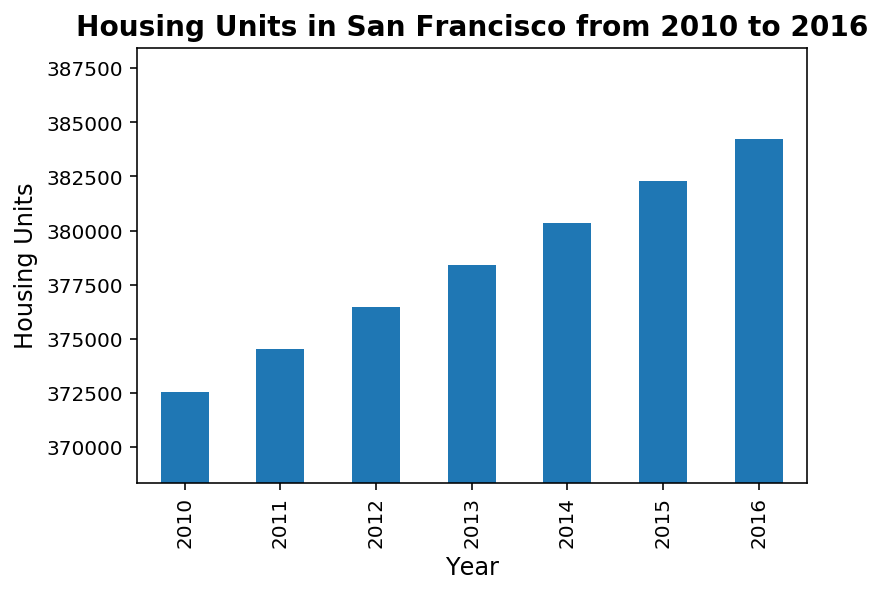
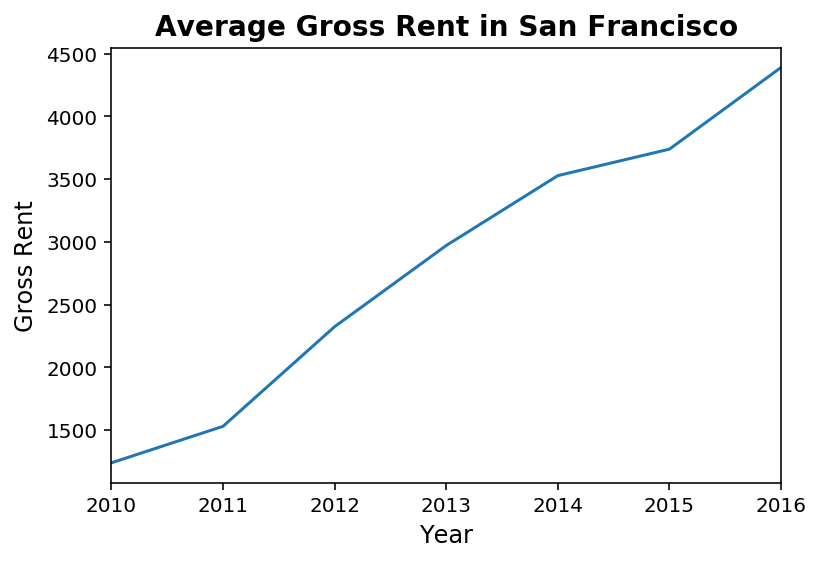
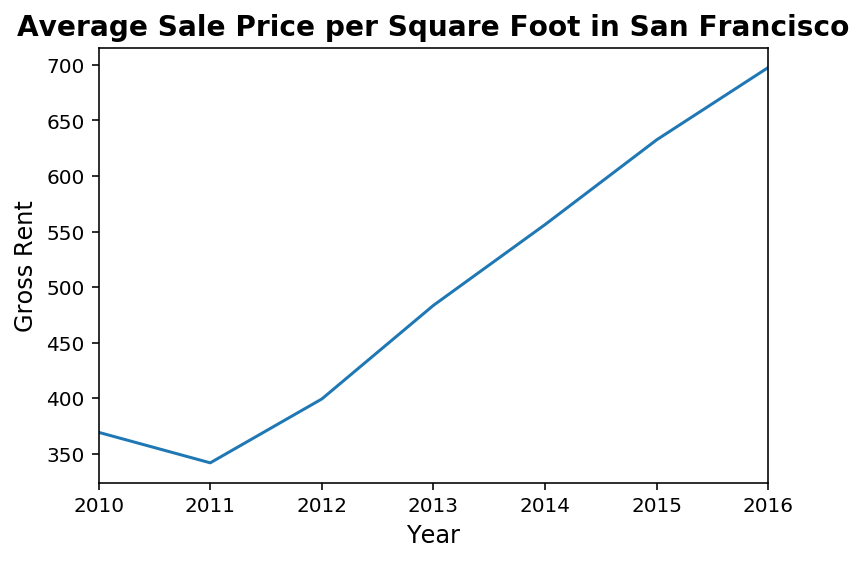

In [17]:
dashboard.servable()